In [1]:
# Importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Reading the dataset and creating a copy to avoid changes to original data
booking_data = pd.read_csv("booking.csv")
b_data = booking_data.copy()

In [3]:
# Length of a dataset
print("Dataset length: ", len(b_data))

Dataset length:  36285


In [4]:
# Size of the dataset
print("Dataset size: ", b_data.shape) 

Dataset size:  (36285, 17)


In [5]:
# First 5 rows
b_data.head(5)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [6]:
# Last 5 rows
b_data.tail(5)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
36284,INN36286,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [7]:
# Data types in the dataset
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [8]:
# Checking for missing values
missing_values = b_data.isna().sum()
print(b_data.isna().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [9]:
# Checking for null values
b_data.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [10]:
# drop the 'Booking ID' columns from the data set. 
b_data = b_data.drop('Booking_ID', axis=1)

In [11]:
# Data description
b_data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [12]:
# Checking for duplicate data
b_data[b_data.duplicated()].count()

number of adults            10276
number of children          10276
number of weekend nights    10276
number of week nights       10276
type of meal                10276
car parking space           10276
room type                   10276
lead time                   10276
market segment type         10276
repeated                    10276
P-C                         10276
P-not-C                     10276
average price               10276
special requests            10276
date of reservation         10276
booking status              10276
dtype: int64

In [13]:
# No duplicate data in this dataset

In [14]:
# Summary of dataset
b_data.describe().T

,count,mean,std,min,25%,50%,75%,max
number of adults,36285.0,1.844839,0.518813,0.0,2.0,2.00,2.0,4.0
number of children,36285.0,0.105360,0.402704,0.0,0.0,0.00,0.0,10.0
number of weekend nights,36285.0,0.810693,0.870590,0.0,0.0,1.00,2.0,7.0
number of week nights,36285.0,2.204602,1.410946,0.0,1.0,2.00,3.0,17.0
car parking space,36285.0,0.030977,0.173258,0.0,0.0,0.00,0.0,1.0
lead time,36285.0,85.239851,85.938796,0.0,17.0,57.00,126.0,443.0
repeated,36285.0,0.025630,0.158032,0.0,0.0,0.00,0.0,1.0
P-C,36285.0,0.023343,0.368281,0.0,0.0,0.00,0.0,13.0
P-not-C,36285.0,0.153369,1.753931,0.0,0.0,0.00,0.0,58.0
average price,36285.0,103.421636,35.086469,0.0,80.3,99.45,120.0,540.0


In [15]:
b_data = b_data.dropna()

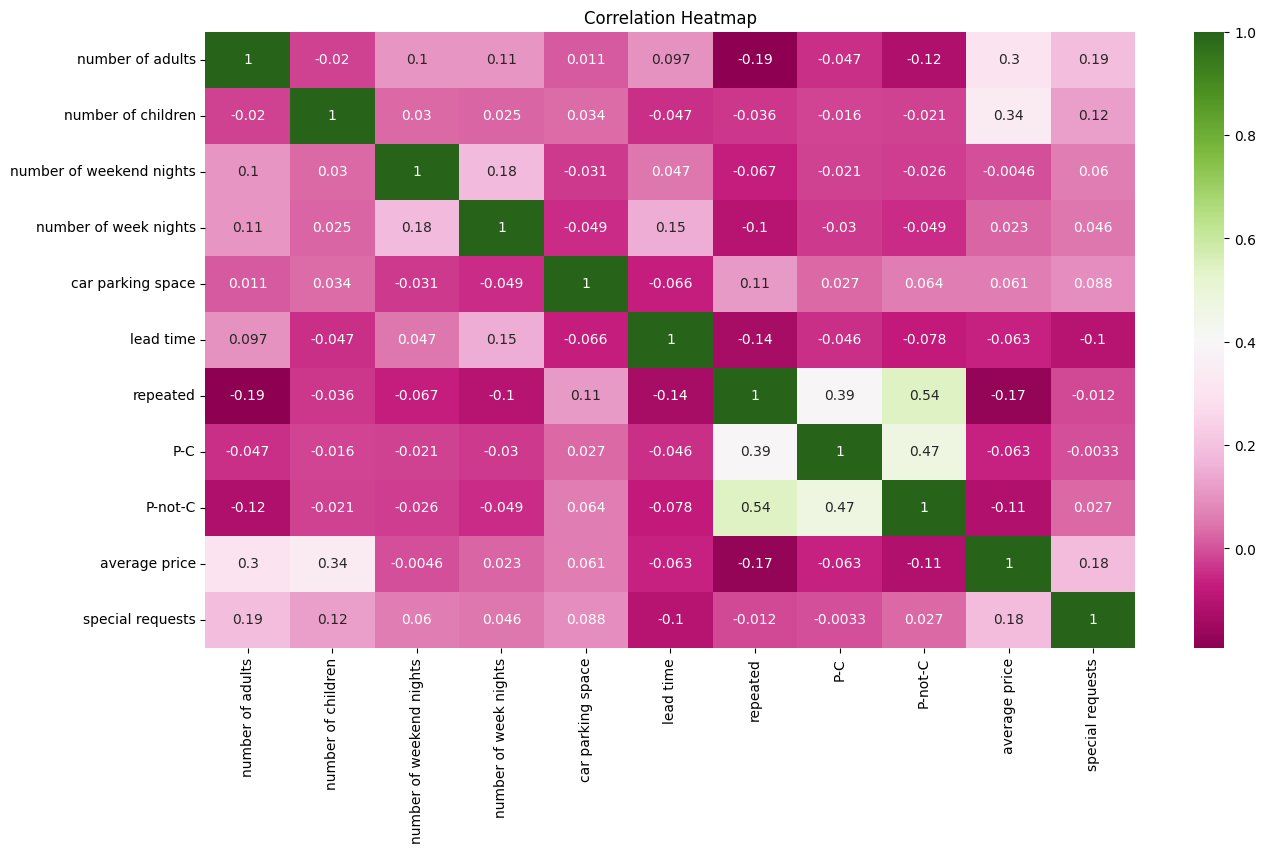

In [16]:
plt.figure(figsize=(15, 8))
numeric_data = b_data.select_dtypes(include=[float, int])  # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()

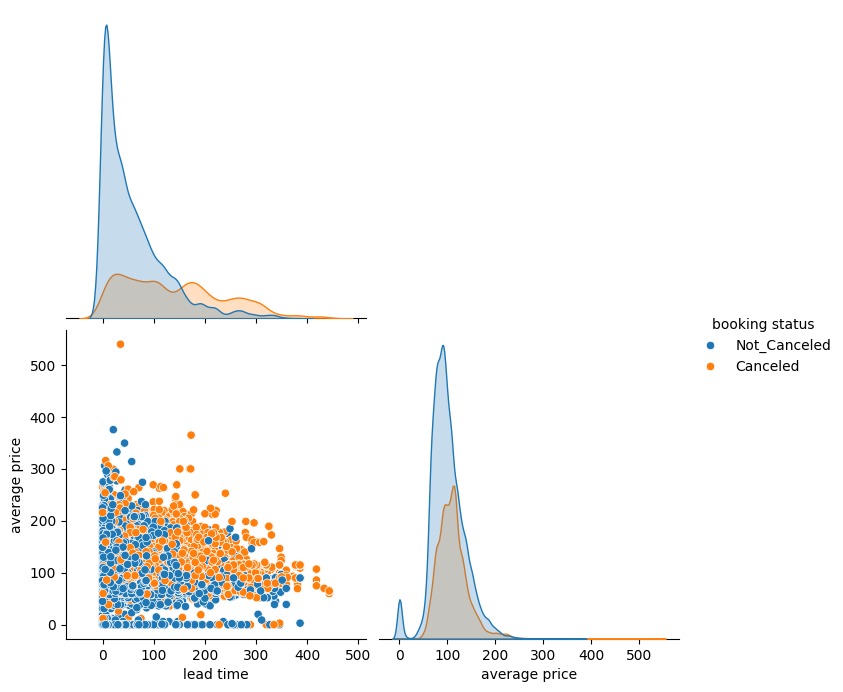

In [17]:
# Observing correlation between booking status/time and booking status/price
sns.pairplot(b_data[["lead time", "average price", "booking status"]], corner=True, \
             height=3.5, hue="booking status");

In [18]:
X = b_data.drop(["booking status"], axis=1)
Y = b_data["booking status"]

X = pd.get_dummies(X, drop_first=True)

In [19]:
# Splitting data in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42)

In [20]:
print("Percentage of classes in training set:")
print(Y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(Y_test.value_counts(normalize=True))

Percentage of classes in training set:
Not_Canceled    0.673412
Canceled        0.326588
Name: booking status, dtype: float64
Percentage of classes in test set:
Not_Canceled    0.669851
Canceled        0.330149
Name: booking status, dtype: float64


In [21]:
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1,
 max_depth=3, min_samples_leaf=5)

In [22]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=1)

In [23]:
# Making the predictions
Y_pred = model.predict(X_test)
Y_pred

array(['Not_Canceled', 'Canceled', 'Not_Canceled', ..., 'Canceled',
       'Canceled', 'Not_Canceled'], dtype=object)

In [24]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    Y_pred = model.predict(predictors)
    cm = confusion_matrix(target, Y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

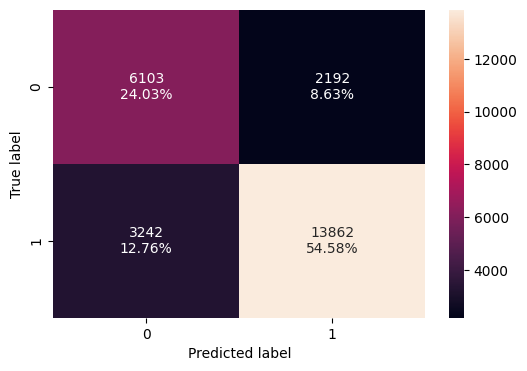

In [25]:
confusion_matrix_sklearn(model, X_train, Y_train)

In [26]:
accuracy = accuracy_score(Y_test, Y_pred)*100
report = classification_report(Y_test, Y_pred)
print("Accuracy is ", accuracy)
print("Classification Report is: \n", classification_report(Y_test, Y_pred))

Accuracy is  78.51368730479516
Classification Report is: 
               precision    recall  f1-score   support

    Canceled       0.66      0.73      0.69      3594
Not_Canceled       0.86      0.81      0.83      7292

    accuracy                           0.79     10886
   macro avg       0.76      0.77      0.76     10886
weighted avg       0.79      0.79      0.79     10886



In [27]:
# Creating a list of column names
feature_names = X_train.columns.to_list()

In [28]:
# Importance of features in the tree building ( The importance of a feature is computed as the
# (Normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                     Imp
lead time                       0.446549
special requests                0.227394
market segment type_Online      0.193020
average price                   0.133038
date of reservation_6/7/2018    0.000000
...                                  ...
date of reservation_12/14/2018  0.000000
date of reservation_12/14/2017  0.000000
date of reservation_12/13/2018  0.000000
date of reservation_12/13/2017  0.000000
date of reservation_9/9/2018    0.000000

[576 rows x 1 columns]


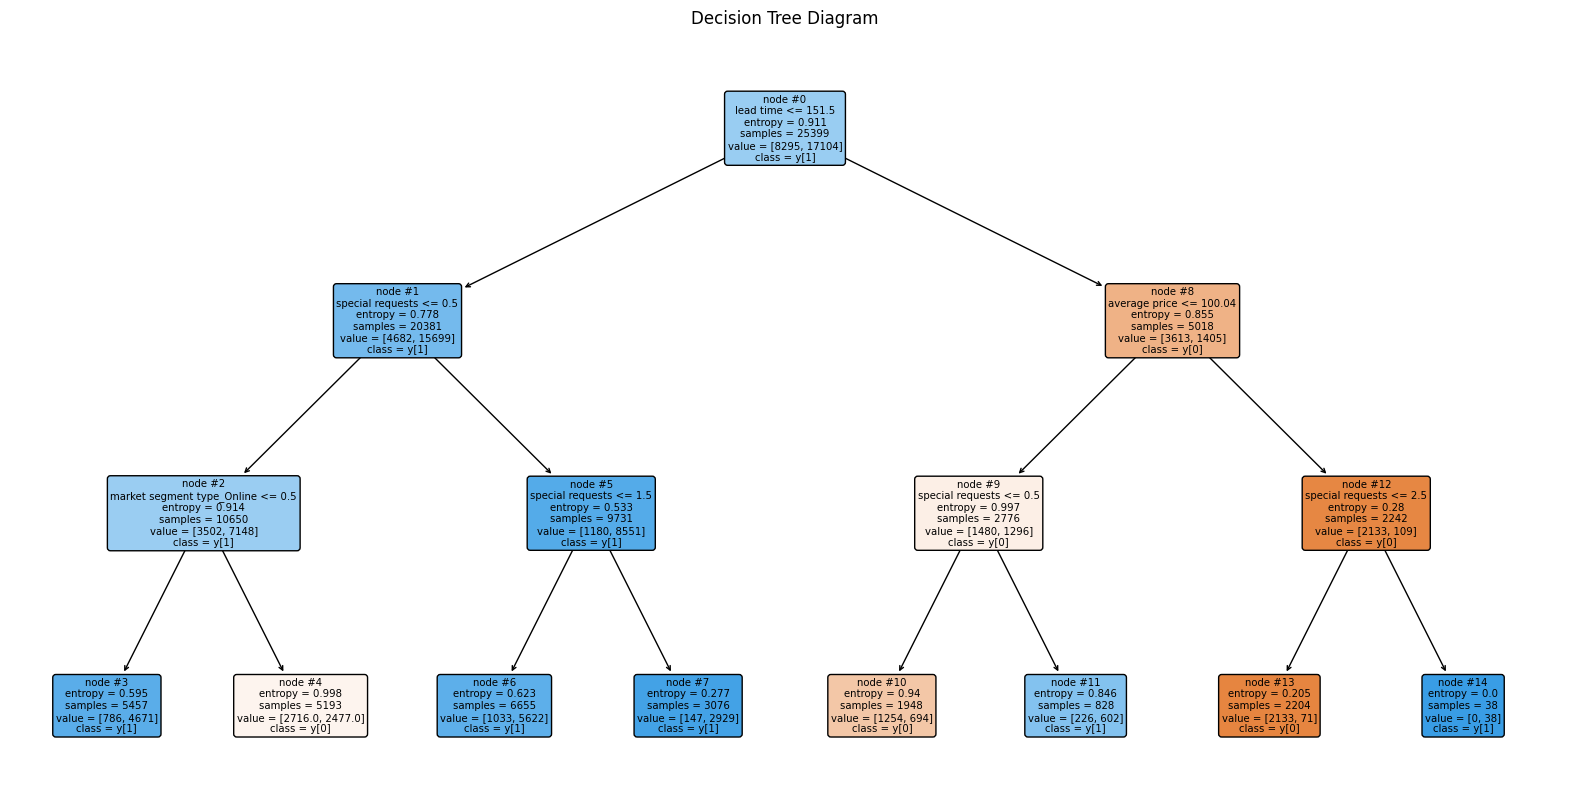

In [29]:
plt.figure(figsize=(20, 10))
plot_tree(model, 
          filled=True,
          feature_names=feature_names,
          class_names=True, 
          node_ids=True,
          rounded=True)
plt.title('Decision Tree Diagram')
plt.show()

In [30]:
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)


                                     Imp
lead time                       0.446549
special requests                0.227394
market segment type_Online      0.193020
average price                   0.133038
date of reservation_6/7/2018    0.000000
...                                  ...
date of reservation_12/14/2018  0.000000
date of reservation_12/14/2017  0.000000
date of reservation_12/13/2018  0.000000
date of reservation_12/13/2017  0.000000
date of reservation_9/9/2018    0.000000

[576 rows x 1 columns]
